In [1]:
import pandas as pandas
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('D:/Assignment/dataset/auto-mpg.csv')
df

<IPython.core.display.Javascript object>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
df =df.drop('car name',axis=1)

In [8]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [9]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [10]:
df['origin']=df['origin'].replace({1:'america',
                                   2:'europe',
                                  3:'asia'})

In [11]:
df['origin']

0      america
1      america
2      america
3      america
4      america
        ...   
393    america
394     europe
395    america
396    america
397    america
Name: origin, Length: 398, dtype: object

In [12]:
df =pd.get_dummies(df,columns=['origin'])

<IPython.core.display.Javascript object>

In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [14]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
hpisdigit = pd.DataFrame(df.horsepower.str.isdigit())
hpisdigit

<IPython.core.display.Javascript object>

,horsepower
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


In [16]:
df.iloc[:,0:7]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


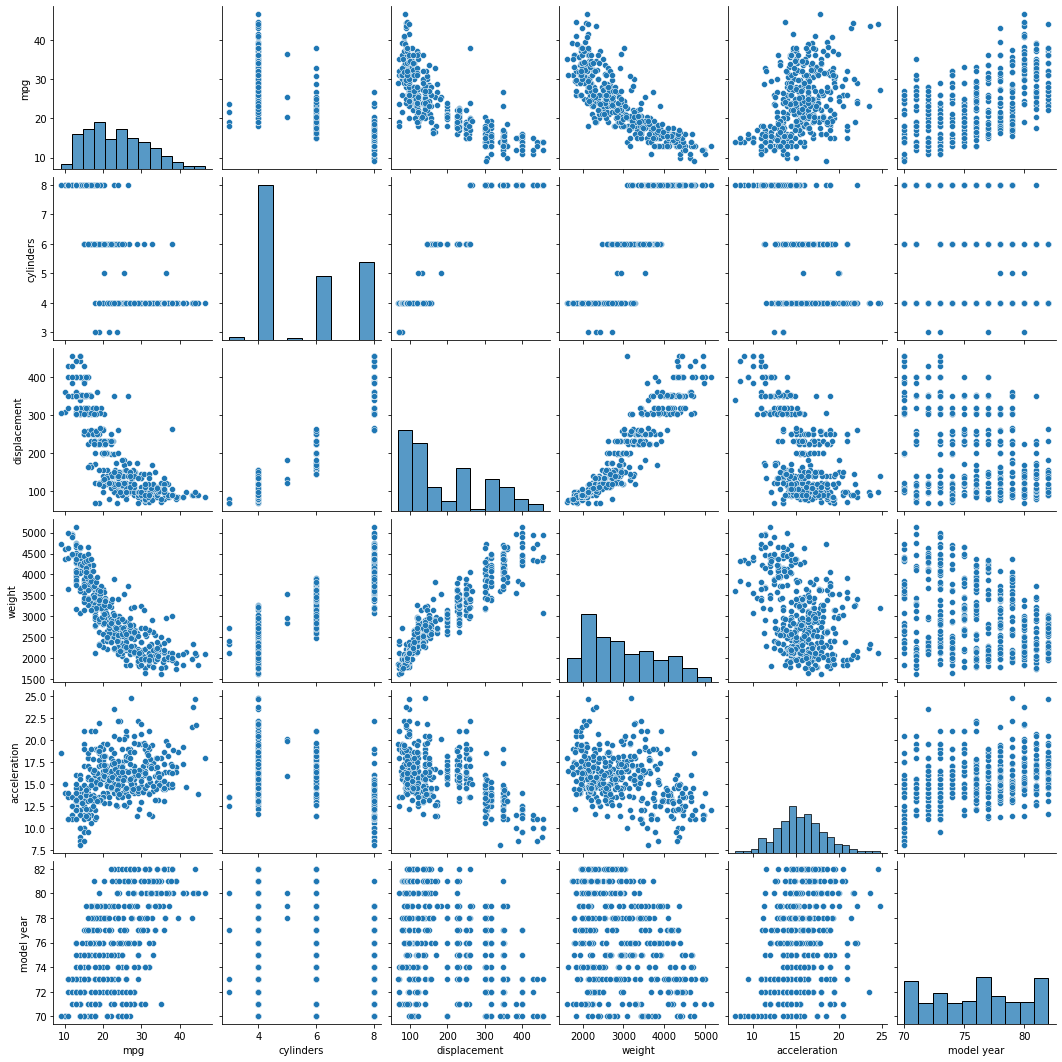

In [17]:
sns.pairplot(df.iloc[:,0:7])

In [18]:
df['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [19]:
df[hpisdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [20]:
df =df.replace('?',np.nan)
df[hpisdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [21]:
df[hpisdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [22]:
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [23]:
medianfill = lambda x : x.fillna(x.median())

df= df.apply(medianfill,axis=0)

In [24]:
df['horsepower'] = df['horsepower'].astype('float64')

In [25]:
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [26]:
df[hpisdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,93.5,2046,19.0,71,1,0,0
126,21.0,6,200.0,93.5,2875,17.0,74,1,0,0
330,40.9,4,85.0,93.5,1835,17.3,80,0,0,1
336,23.6,4,140.0,93.5,2905,14.3,80,1,0,0
354,34.5,4,100.0,93.5,2320,15.8,81,0,0,1
374,23.0,4,151.0,93.5,3035,20.5,82,1,0,0


In [27]:
X = df.drop(['origin_america', 'origin_asia', 'origin_europe'], axis=1)

y = df['mpg']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [29]:
Lr = LinearRegression()

In [30]:
Lr.fit(X_train,y_train)

LinearRegression()

In [31]:
Lr.score(X_test,y_test)

1.0

In [32]:
Lr.intercept_

-3.552713678800501e-15

In [33]:
Lr.coef_

array([ 1.00000000e+00, -9.52204975e-17, -8.85567916e-17, -1.39023499e-16,
        1.86070957e-17, -3.44915689e-17, -4.97371380e-17])

In [34]:
y_pred = Lr.predict(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
print("R2_score:", r2_score(y_pred, y_test))

R2_score: 1.0


In [37]:
print("Mean_squared_error:", mean_squared_error(y_pred, y_test))

Mean_squared_error: 8.920439116239201e-29


In [38]:
print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

RMSE: 9.444807629718671e-15
